In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [189]:
Draft_Phase = pd.read_csv("../data/vct_2021/matches/draft_phase.csv")
eco_rounds = pd.read_csv("../data/vct_2021/matches/eco_rounds.csv")
eco_stats = pd.read_csv("../data/vct_2021/matches/eco_stats.csv")


In [190]:
eco_rounds.head(n=10)

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
0,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,1,Vision Strikers,3.9k,0.4k,Eco: 0-5k,Win
1,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,1,FULL SENSE,3.4k,0.2k,Eco: 0-5k,Loss
2,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,2,Vision Strikers,14.4k,5.2k,Semi-buy: 10-20k,Win
3,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,2,FULL SENSE,2.4k,8.4k,Eco: 0-5k,Loss
4,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,3,Vision Strikers,17.6k,15.2k,Semi-buy: 10-20k,Loss
5,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,3,FULL SENSE,19.9k,0.9k,Semi-buy: 10-20k,Win
6,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,4,Vision Strikers,22.6k,4.7k,Full buy: 20k+,Win
7,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,4,FULL SENSE,21.7k,9.0k,Full buy: 20k+,Loss
8,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,5,Vision Strikers,22.0k,4.2k,Full buy: 20k+,Win
9,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,5,FULL SENSE,10.0k,10.2k,Semi-buy: 10-20k,Loss


In [191]:
eco_rounds.head(n=10)


,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
0,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,1,Vision Strikers,3.9k,0.4k,Eco: 0-5k,Win
1,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,1,FULL SENSE,3.4k,0.2k,Eco: 0-5k,Loss
2,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,2,Vision Strikers,14.4k,5.2k,Semi-buy: 10-20k,Win
3,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,2,FULL SENSE,2.4k,8.4k,Eco: 0-5k,Loss
4,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,3,Vision Strikers,17.6k,15.2k,Semi-buy: 10-20k,Loss
5,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,3,FULL SENSE,19.9k,0.9k,Semi-buy: 10-20k,Win
6,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,4,Vision Strikers,22.6k,4.7k,Full buy: 20k+,Win
7,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,4,FULL SENSE,21.7k,9.0k,Full buy: 20k+,Loss
8,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,5,Vision Strikers,22.0k,4.2k,Full buy: 20k+,Win
9,Valorant Champions 2021,Group Stage,Opening (D),Vision Strikers vs FULL SENSE,Haven,5,FULL SENSE,10.0k,10.2k,Semi-buy: 10-20k,Loss


In [192]:
#print(eco_rounds.Stage)
df = eco_rounds.loc[(eco_rounds["Stage"]=="Playoffs")& (eco_rounds["Tournament"]=="Valorant Champions 2021")]
print(len(eco_rounds))
print(len(df))
#print(spEco)


360734
868


Function convert_to_int which changes values like $21.5k$ to a number.

In [193]:
def convert_to_int(word:str)->float:
    return float(word.replace("k", ""))

#convert_to_int(df[ "Loadout Value"][3])

df["Loadout Value"]=df["Loadout Value"].apply(convert_to_int)
df["Remaining Credits"]=df["Remaining Credits"].apply(convert_to_int)


C:\Users\parab\AppData\Local\Temp\ipykernel_17152\4196184128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Loadout Value"]=df["Loadout Value"].apply(convert_to_int)
C:\Users\parab\AppData\Local\Temp\ipykernel_17152\4196184128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Remaining Credits"]=df["Remaining Credits"].apply(convert_to_int)


In [199]:

df["Spent Credits"] = df["Loadout Value"] - df["Remaining Credits"]
df.head(10)

C:\Users\parab\AppData\Local\Temp\ipykernel_17152\319391468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spent Credits"] = df["Loadout Value"] - df["Remaining Credits"]


,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome,Spent Credits
2110,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,1,Acend,4.1,0.2,Eco: 0-5k,Win,3.9
2111,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,1,Team Secret,3.8,0.2,Eco: 0-5k,Loss,3.6
2112,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,2,Acend,17.0,1.3,Semi-buy: 10-20k,Win,15.7
2113,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,2,Team Secret,3.1,8.1,Eco: 0-5k,Loss,-5.0
2114,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,3,Acend,18.5,4.6,Semi-buy: 10-20k,Win,13.9
2115,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,3,Team Secret,20.5,0.8,Full buy: 20k+,Loss,19.7
2116,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,4,Acend,20.1,9.5,Full buy: 20k+,Win,10.6
2117,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,4,Team Secret,8.4,8.5,Semi-eco: 5-10k,Loss,-0.1
2118,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,5,Acend,23.9,9.6,Full buy: 20k+,Win,14.3
2119,Valorant Champions 2021,Playoffs,Quarterfinals,Acend vs Team Secret,Icebox,5,Team Secret,23.5,2.0,Full buy: 20k+,Loss,21.5


In [ ]:
df.eq

<bound method flex_comp_method_FRAME.<locals>.f of                    Tournament        Stage   Match Type  \
0     Valorant Champions 2021  Group Stage  Opening (D)   
1     Valorant Champions 2021  Group Stage  Opening (D)   
2     Valorant Champions 2021  Group Stage  Opening (D)   
3     Valorant Champions 2021  Group Stage  Opening (D)   
4     Valorant Champions 2021  Group Stage  Opening (D)   
...                       ...          ...          ...   
2105  Valorant Champions 2021  Group Stage  Decider (A)   
2106  Valorant Champions 2021  Group Stage  Decider (A)   
2107  Valorant Champions 2021  Group Stage  Decider (A)   
2108  Valorant Champions 2021  Group Stage  Decider (A)   
2109  Valorant Champions 2021  Group Stage  Decider (A)   

                         Match Name    Map  Round Number             Team  \
0     Vision Strikers vs FULL SENSE  Haven             1  Vision Strikers   
1     Vision Strikers vs FULL SENSE  Haven             1       FULL SENSE   
2     Vis

c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


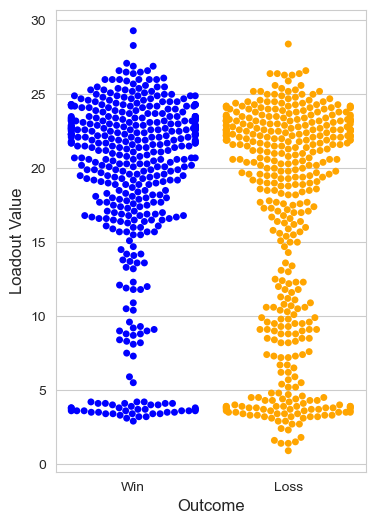

In [196]:
## Make a figure object
plt.figure(figsize=(4,6))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.swarmplot(data=df,
               x = 'Outcome',
               y = 'Loadout Value',
            hue='Outcome',
            palette=['blue', 'orange'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Loadout Value", fontsize=12)

plt.show()

c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.5% of the points 

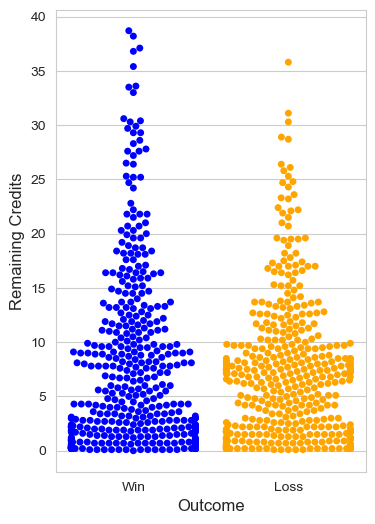

In [198]:
## Make a figure object
plt.figure(figsize=(4,6))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.swarmplot(data=df,
               x = 'Outcome',
               y = 'Remaining Credits',
            hue='Outcome',
            palette=['blue', 'orange'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Remaining Credits", fontsize=12)

plt.show()

c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\parab\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


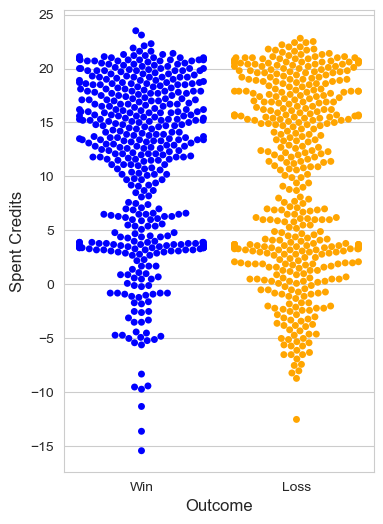

In [200]:
## Make a figure object
plt.figure(figsize=(4,6))

## Call swarmplot
## First put in the dataframe in data = 
## Then what you want on the x and y axis
## Finally, palette, an optional input, allows me to color the points
sns.swarmplot(data=df,
               x = 'Outcome',
               y = 'Spent Credits',
            hue='Outcome',
            palette=['blue', 'orange'],
            legend=False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Spent Credits", fontsize=12)

plt.show()

In [ ]:
tournaments_stages_match_types_ids = pd.read_csv("../data/vct_2021/ids/tournaments_stages_matches_games_ids.csv")
tournaments_stages_match_types_ids.head()

,Tournament,Tournament ID,Stage,Stage ID,Match Type,Match Name,Match ID,Map,Game ID
0,Valorant Champions 2021,449,Group Stage,945,Opening (D),Vision Strikers vs FULL SENSE,51282,Haven,57948
1,Valorant Champions 2021,449,Group Stage,945,Opening (D),Vision Strikers vs FULL SENSE,51282,Breeze,57949
2,Valorant Champions 2021,449,Group Stage,945,Opening (C),Team Vikings vs Crazy Raccoon,51278,Icebox,57936
3,Valorant Champions 2021,449,Group Stage,945,Opening (C),Team Vikings vs Crazy Raccoon,51278,Haven,57937
4,Valorant Champions 2021,449,Group Stage,945,Opening (D),FNATIC vs Cloud9,51283,Icebox,57951
